In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = "https://es.wikipedia.org/wiki/Leucocito"
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
tabla = soup.find('span', {'id': 'Clasificación'}).parent.find_next_sibling('table')

print(tabla)


<table class="wikitable">
<tbody><tr>
<th>Tipo</th>
<th>Apariencia microscópica</th>
<th>Diagrama</th>
<th>Porcentaje aproximado en adultos</th>
<th>Diámetro (μm)</th>
<th><sup class="reference separada" id="cite_ref-isbn0-443-01657-7_7-0"><a href="#cite_note-isbn0-443-01657-7-7"><span class="corchete-llamada">[</span>7<span class="corchete-llamada">]</span></a></sup>​ Principal objetivo</th>
<th><sup class="reference separada" id="cite_ref-alberts_table_4-1"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Núcleo</th>
<th><sup class="reference separada" id="cite_ref-alberts_table_4-2"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Gránulos</th>
<th><sup class="reference separada" id="cite_ref-alberts_table_4-3"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></

In [21]:
filas = tabla.find_all('tr')
datos = {'Tipo de Leucocito': [], 'Porcentaje Aproximado en Adultos (%)': []}

encabezados = filas[0].find_all('th')
indice_porcentaje = None
for i, encabezado in enumerate(encabezados):
    if 'porcentaje' in encabezado.text.lower():
        indice_porcentaje = i
        break


if indice_porcentaje is not None:
    for fila in filas[1:]:
        celdas = fila.find_all(['td', 'th'])
        tipo = celdas[0].text.strip()
        porcentaje = celdas[indice_porcentaje].text.strip()
        datos['Tipo de Leucocito'].append(tipo)
        datos['Porcentaje Aproximado en Adultos (%)'].append(porcentaje)

    df = pd.DataFrame(datos)
    df['Porcentaje Aproximado en Adultos (%)'] = df['Porcentaje Aproximado en Adultos (%)'].str.replace('%', '').astype(float)

    df = df.sort_values(by='Porcentaje Aproximado en Adultos (%)', ascending=False)
    print(df)
else:
    print('No se encontró la columna de porcentajes en la tabla.')



  Tipo de Leucocito  Porcentaje Aproximado en Adultos (%)
0        Neutrófilo                                  62.0
3         Linfocito                                  30.0
4          Monocito                                   5.3
1        Eosinófilo                                   2.3
2          Basófilo                                   0.4


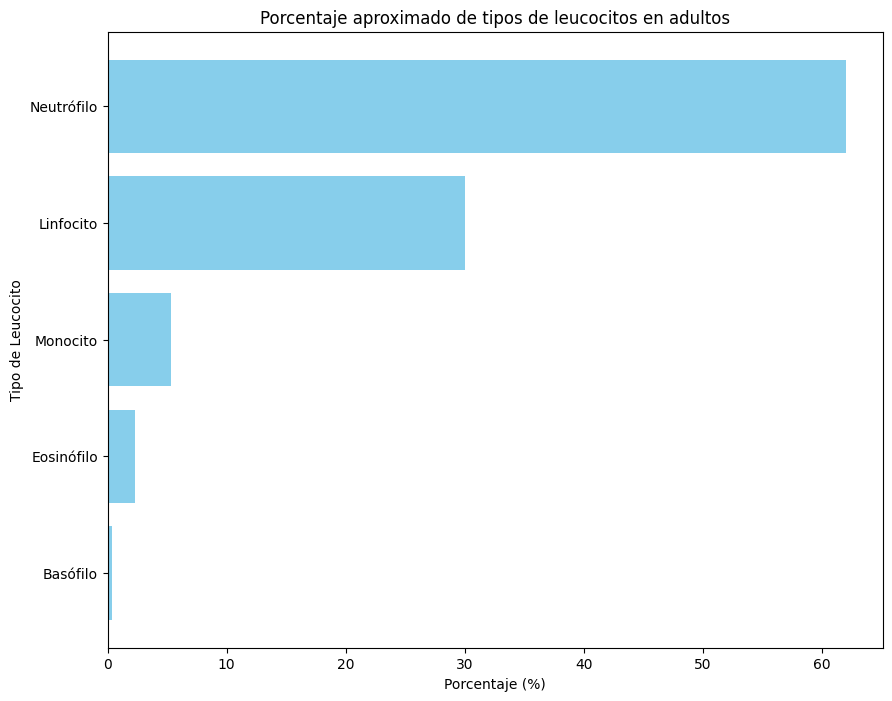

In [22]:
plt.figure(figsize=(10, 8))
plt.barh(df['Tipo de Leucocito'], df['Porcentaje Aproximado en Adultos (%)'], color='skyblue')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Tipo de Leucocito')
plt.title('Porcentaje aproximado de tipos de leucocitos en adultos')
plt.gca().invert_yaxis()  # Invertir el eje y para que los tipos de leucocitos aparezcan en orden descendente
plt.show()